# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset

df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')
print('Dataset loaded. Shape:', df.shape)

# Display first few rows
df.head()

Dataset loaded. Shape: (3761, 9)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following:
1. How many unique job titles are there?
2. What is the average salary (salary_in_usd) per work_year?
3. Create a bar plot showing average salary by experience_level.

💡 Tip: Use `groupby()` and `mean()`.

1. There are 93 unique job titles

2. Average salary per work_year:
   work_year  salary_in_usd
0       2020       92302.63
1       2021       94087.21
2       2022      133379.51
3       2023      148954.56

3. Average salary by experience_level:
  experience_level  salary_in_usd
0               EN   78546.284375
1               EX  194930.929825
2               MI  104544.864030
3               SE  153062.468626


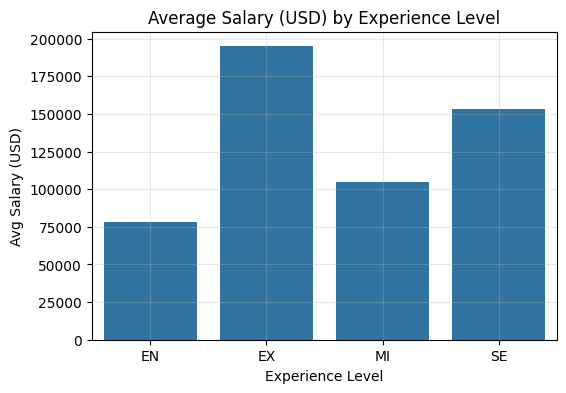

In [27]:

uniqueJob = df['job_title'].nunique()
print(f'1. There are {uniqueJob} unique job titles')

# 2. Average salary per working year
avg_by_year = df.groupby('work_year')['salary_in_usd'].mean().round(2).reset_index()
print('\n2. Average salary per work_year:')
print(avg_by_year)

# 3. Bar plot of average salary by experience_level
avg_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
print('\n3. Average salary by experience_level:')
print(avg_by_exp)


plt.figure(figsize=(6,4))
sns.barplot(data=avg_by_exp, x='experience_level', y='salary_in_usd')
plt.title('Average Salary (USD) by Experience Level')
plt.ylabel('Avg Salary (USD)')
plt.xlabel('Experience Level')
plt.grid(alpha=0.3)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

- Select features: work_year, experience_level, and optionally job_title (you decide!)
- Encode categorical variables (experience_level) using LabelEncoder or pd.get_dummies()
- Define X (features) and y (target = salary_in_usd)

⚠️ Important: Do NOT include salary, salary_currency, or salary_in_usd in your features!

In [28]:

y = df['salary_in_usd']


X = df[['work_year', 'experience_level']].copy()


le = LabelEncoder()
X['experience_level_enc'] = le.fit_transform(X['experience_level'])
X = X.drop(columns=['experience_level'])

print('Feature head:')
X.head()

Feature head:


,work_year,experience_level_enc
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model


In [29]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for 2024 with different experience levels and predict their salaries.

Use the same encoding as before!

In [31]:

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_enc': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict salaries for 2024
predicted_salary = model.predict(future_data)

# Display results
predicted_2024 = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salary
})

predicted_2024


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

1. Does your model make reasonable predictions? Why or why not?

   Yes, it predicts higher salaries for higher experience levels, which makes sense. But the low R² score shows it’s not very accurate.

2. What are the limitations of using only work_year and experience_level?

   It ignores other factors like job title, company size, and location, so it can’t fully explain salary differences.

3. How could you improve this model? (Think: more features, better encoding, etc.)

   Add more features, use better encoding and try other models.

4. Why is R² not enough to trust your predictions?

   R² shows fit but not accuracy. A model can have a decent R² yet still make poor predictions if key variables are missing.

## 📤 Submission Instructions
- Save this notebook as: LastName_FirstName_SalaryPrediction.ipynb
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀